In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn import tree
import graphviz

In [2]:
def select_model_hyperparams(X, y):
    tree_params = {"max_depth": [6, 7, 8, 9, 10, 11, 12, 13, 14],
                   "max_leaf_nodes": [28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]}

    clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=1),
                      param_grid=tree_params,
                      scoring="accuracy",
                      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=25, random_state=2),
                      n_jobs=-1)

    return clf.fit(X, y)

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
print(train_data.shape, test_data.shape)

(891, 12) (418, 11)


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
feature_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [8]:
X_train = train_data[feature_names]
y_train = train_data.Survived

In [9]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
X_train = pd.get_dummies(X_train)
new_feature_names = X_train.columns

In [11]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [13]:
print(X_train.Age.median())
print(X_train.Age.mean())

28.0
29.69911764705882


In [14]:
X_train.fillna(value=X_train.Age.median(), axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [15]:
clf = select_model_hyperparams(X_train, y_train);

In [16]:
print("Best average validation score: {}".format(clf.best_score_.round(3)))
for pname, pvalue in clf.best_params_.items():
    print("  Param: {} = {}".format(pname, pvalue))

Best average validation score: 0.825
  Param: max_depth = 8
  Param: max_leaf_nodes = 28


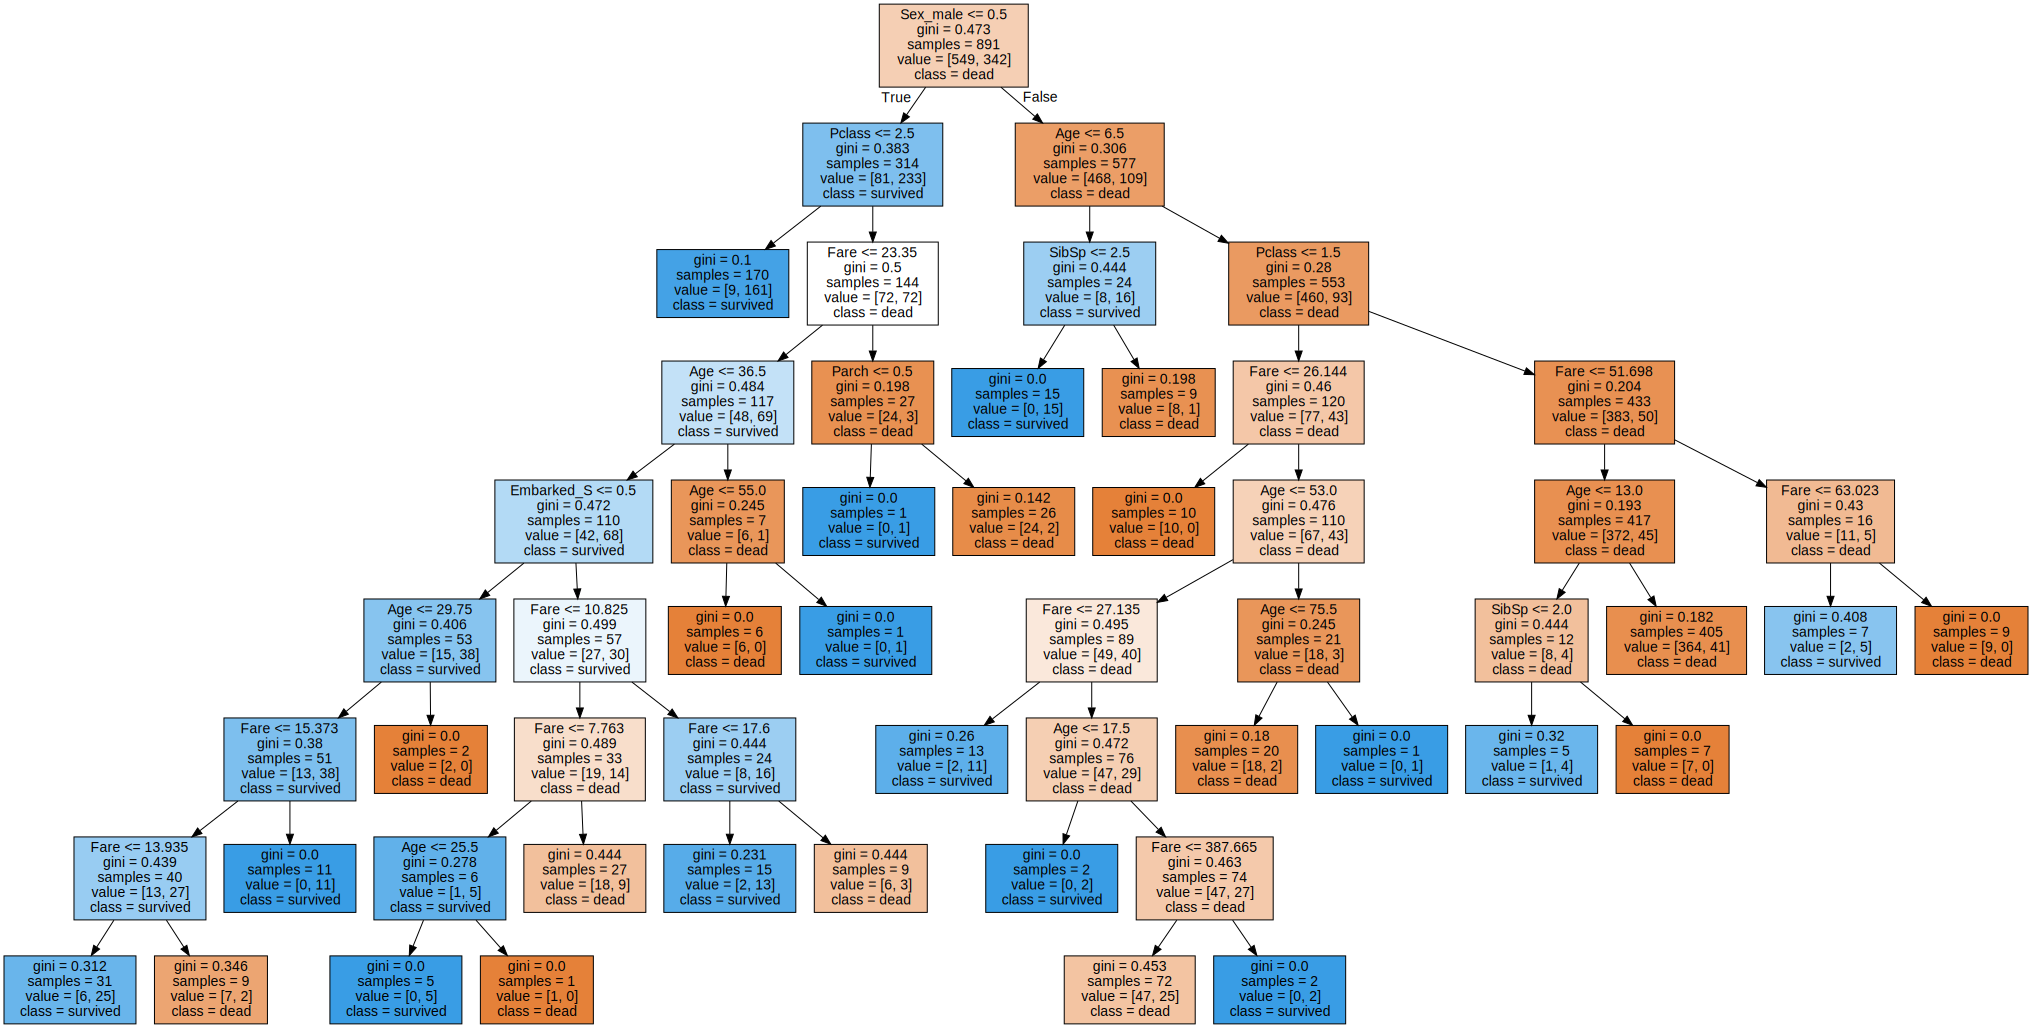

In [17]:
dot_data = tree.export_graphviz(clf.best_estimator_, out_file=None, 
                                feature_names=new_feature_names,  
                                class_names=["dead", "survived"],
                                filled=True)
    
tree_plot = graphviz.Source(dot_data, format="svg")
tree_plot

In [18]:
def prepare_Xdata(data):
    feature_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
    X = data[feature_names]
    
    X = pd.get_dummies(X)
    new_feature_names = X.columns
    
    X.fillna(value=X.Age.median(), axis=1, inplace=True)
    
    return (X, new_feature_names)    

In [19]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [20]:
X_train, feature_names = prepare_Xdata(train_data)
X_test, _ = prepare_Xdata(test_data)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [23]:
clf = select_model_hyperparams(X_train, train_data.Survived);

In [24]:
print("Best average validation score: {}".format(clf.best_score_.round(3)))
for pname, pvalue in clf.best_params_.items():
    print("  Param: {} = {}".format(pname, pvalue))

Best average validation score: 0.825
  Param: max_depth = 8
  Param: max_leaf_nodes = 28


In [25]:
predictions = clf.predict(X_test)

In [26]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [27]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [28]:
output.to_csv('submission_01.csv', index=False)